# MIS710 Machine Learning in Business - Assignment 2

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

Using the BACCM framework

The Business Analysis Core Concept Model (BACCM) framework helps provide a comprehensive understanding of the business context surrounding the customer attrition problem at VSNeoBank.

* Stakeholders: 
    * VSNeoBank: The banking platform seeking to improve customer retention and mitigate the negative impact of customer attrition on their business. This includes VSNeoBank's management team, specifically the Head of Data Analytics, Ms. Emma Hoang. 
    * Customers: Existing and potential customers of VSNeoBank who play a crucial role in driving the bank's growth, revenue, and success.

* Business Need: VSNeoBank needs to address the issue of increased customer attrition to maintain its customer base, retain revenue, and sustain market competitiveness. By implementing effective strategies to reduce churn, the bank aims to enhance customer satisfaction, increase customer loyalty, and maximize customer lifetime value.

* Goals: The primary goal is to reduce the customer attrition rate and improve customer retention. This involves retaining existing customers, increasing customer satisfaction, and enhancing the overall banking experience to foster long-term customer loyalty.

* Business Objectives: The objectives include analyzing the customer and transaction databases to identify patterns and predictors of churn. Additionally, developing and testing machine learning models to predict customer churn and implementing targeted retention strategies based on the insights gained.
    * Reduce customer attrition rate: VSNeoBank aims to decrease the rate at which customers discontinue their relationship with the bank, ensuring long-term customer retention.
    * Enhance customer satisfaction: The bank seeks to improve customer experience and meet customer expectations, resulting in higher satisfaction levels.
    * Increase customer loyalty: VSNeoBank aims to foster strong relationships with customers, encouraging them to remain loyal and actively engage with the bank's services.
    * Optimize profitability: By retaining existing customers, the bank can minimize customer acquisition costs and maximize revenue from ongoing customer relationships.
    

* Contextual Factors: The contextual factors influencing the customer attrition problem at VSNeoBank include the digital banking landscape, competitive market dynamics, customer preferences and expectations, the bank's product and service offerings, customer service quality, and the bank's overall brand reputation.

* Business Requirements: The business requirements involve leveraging the available dataset to gain insights into customer demographics, behavior, and factors influencing churn. It requires the development of machine learning models to predict churn accurately and the implementation of proactive strategies to improve customer retention.

* Solution Approach: The solution approach involves conducting a comprehensive analysis of the dataset, employing data analytics techniques to identify key drivers of churn, and developing machine learning models for churn prediction. The models will enable VSNeoBank to segment customers, identify at-risk customers, and implement personalized retention strategies.

* Constraints: Digital-only platform: VSNeoBank operates solely online, limiting face-to-face interactions and requiring innovative digital solutions to address customer attrition.
Data availability and analysis: The success of addressing the problem relies on accurate data collection, analysis, and modeling to identify churn predictors and develop effective retention strategies.


By applying the BACCM framework, VSNeoBank can gain a holistic understanding of the business problem, its context, and the necessary steps to address the customer attrition challenge effectively. This framework provides a structured approach to align stakeholders, define goals and objectives, consider contextual factors, and determine the solution approach, ultimately leading to improved customer retention and business success.


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation


In [1]:
# Load required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data Preparation and Wrangling

In [2]:
# loading the data 

data = pd.read_csv("VSNeoBank.csv")
data.sample(5)

,CustomerID,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status
4577,1437419912,M,54,Married,2,$70K - $90K,Silver,2189.0,4,35,382,0.175,2750,51,4,3,Closed
6494,1416895262,M,48,Married,3,Less than $50K,Silver,3305.0,4,37,2517,0.762,2027,57,3,3,Active
4303,1428244562,M,37,Divorced,2,$90K - $110K,Silver,2281.0,3,36,1677,0.735,2735,58,2,3,Active
728,1513148012,F,45,Single,3,Less than $50K,Silver,2020.0,6,36,1103,0.546,4951,85,3,2,Active
441,1559366912,F,48,Married,3,$50K - $70K,Silver,14899.0,6,31,0,0.000,1519,26,4,3,Closed


In [3]:
records = data.shape[0]
features = data.shape[1]

print(f"The dataset has {records} records and {features} features")

The dataset has 8101 records and 17 features


* Quality Issue - The column names are long words with most of them having words separated by spaces.
* Solution - To solve the issue, I will change the space between the words in the column names to an underscore(_) and convert the column names to lower case.


In [4]:
data.columns = [cols.replace(" ", "_").lower() for cols in data.columns]

data.sample(2)

,customerid,sex,age,marital_status,number_of_dependants,annual_income,account_type,credit_limit,number_of_accounts,months_since_openning,outstanding_balance,utilisation_ratio,total_amount_of_transactions,total_number_of_transactions,number_of_contacts_over_12_months,months_inactive_over_12_months,status
28,1556792762,F,46,Divorced,2,Less than $50K,Silver,1870.0,4,26,1785,0.955,4347,88,1,3,Active
703,1436434112,F,54,Married,3,Less than $50K,Silver,2556.0,6,36,2260,0.884,1401,30,4,2,Active


In [5]:
#checking for duplicates

data.duplicated(subset='customerid').sum()

0

In [6]:
#checking for nulls
data.isnull().sum()

customerid                           0
sex                                  0
age                                  0
marital_status                       0
number_of_dependants                 0
annual_income                        0
account_type                         0
credit_limit                         0
number_of_accounts                   0
months_since_openning                0
outstanding_balance                  0
utilisation_ratio                    0
total_amount_of_transactions         0
total_number_of_transactions         0
number_of_contacts_over_12_months    0
months_inactive_over_12_months       0
status                               0
dtype: int64

In [7]:
# checking the data types of features in the dataset

data.dtypes

customerid                             int64
sex                                   object
age                                    int64
marital_status                        object
number_of_dependants                   int64
annual_income                         object
account_type                          object
credit_limit                         float64
number_of_accounts                     int64
months_since_openning                  int64
outstanding_balance                    int64
utilisation_ratio                    float64
total_amount_of_transactions           int64
total_number_of_transactions           int64
number_of_contacts_over_12_months      int64
months_inactive_over_12_months         int64
status                                object
dtype: object

* No duplicated customer_id in the dataset
* No nulls in the data set but some columns contain values of "Unknown" - To be explored in other sections
* The data type of the columns looks okay and matches the data description but needs more exploration


In [8]:
# getting number of unique values in a dataset
col_info = {}

col_unique = []
col_list = []
col_dtype = []

for col in data.columns:
    col_list.append(col)
    col_unique.append(data[col].nunique())
    col_dtype.append(data[col].dtypes)
    
col_info['column'] = col_list
col_info['unique'] = col_unique
col_info['dtype'] = col_dtype

pd.DataFrame(col_info)
    

,column,unique,dtype
0,customerid,8101,int64
1,sex,2,object
2,age,43,int64
3,marital_status,4,object
4,number_of_dependants,6,int64
5,annual_income,6,object
6,account_type,4,object
7,credit_limit,5285,float64
8,number_of_accounts,6,int64
9,months_since_openning,44,int64


* Columns with less than 8 unique values should have category datatype to avoid misinterpreting as a continuous variable..

In [9]:
#converting datatype of columns to category
for col in data.columns:
    if data[col].nunique() <= 7:
        data[col] = data[col].astype("category")

In [10]:
data.dtypes

customerid                              int64
sex                                  category
age                                     int64
marital_status                       category
number_of_dependants                 category
annual_income                        category
account_type                         category
credit_limit                          float64
number_of_accounts                   category
months_since_openning                   int64
outstanding_balance                     int64
utilisation_ratio                     float64
total_amount_of_transactions            int64
total_number_of_transactions            int64
number_of_contacts_over_12_months    category
months_inactive_over_12_months       category
status                               category
dtype: object

### Data Visualization

In [11]:
target = "status"
cat_cols = (list(data.select_dtypes("category").columns))[:-1]
num_cols = (list(data.select_dtypes(float).columns))
num_cols.extend(list(data.select_dtypes(int).columns))

print(f"cat_cols: {cat_cols}\nnum_cols: {num_cols}")

cat_cols: ['sex', 'marital_status', 'number_of_dependants', 'annual_income', 'account_type', 'number_of_accounts', 'number_of_contacts_over_12_months', 'months_inactive_over_12_months']
num_cols: ['credit_limit', 'utilisation_ratio', 'customerid', 'age', 'months_since_openning', 'outstanding_balance', 'total_amount_of_transactions', 'total_number_of_transactions']


#### Univariate Analysis

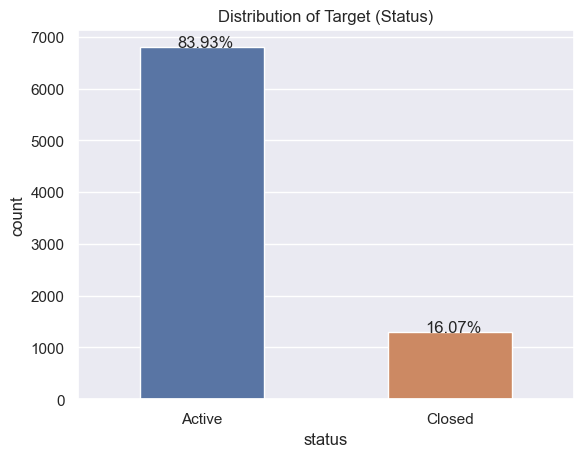

In [12]:

ax = sns.countplot(data = data , x = target, width= 0.5)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()*100/data.shape[0]), (p.get_x()+0.15, p.get_height()+0.65))

plt.title("Distribution of Target (Status)")
    
plt.show()

Only 16.07% of the 8101 records in the dataset had a status of "Closed” while 83.93% had the status of “Active”. The disparity between the classes shows a very high class imbalance. Since for the purpose of this analysis, oversampling and undersampling were not utilized , therefore the main metric for any machine learning model evaluation should be the roc_auc score also known as the AUC (Area Under the Curve).


In [13]:
data.describe()

,customerid,age,credit_limit,months_since_openning,outstanding_balance,utilisation_ratio,total_amount_of_transactions,total_number_of_transactions
count,8.101000e+03,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,1.478333e+09,46.273176,8686.277768,35.874830,1163.520553,0.274287,4397.203308,64.877916
std,7.362533e+07,7.981850,9095.531430,7.968666,815.008448,0.276103,3390.907493,23.398471
min,1.416168e+09,26.000000,1438.300000,13.000000,0.000000,0.000000,510.000000,10.000000
25%,1.426247e+09,41.000000,2570.000000,31.000000,350.000000,0.022000,2148.000000,45.000000
50%,1.435927e+09,46.000000,4592.000000,36.000000,1282.000000,0.174000,3896.000000,67.000000
75%,1.545874e+09,52.000000,11236.000000,40.000000,1784.000000,0.504000,4739.000000,81.000000
max,1.656690e+09,68.000000,34516.000000,56.000000,2517.000000,0.999000,18484.000000,139.000000


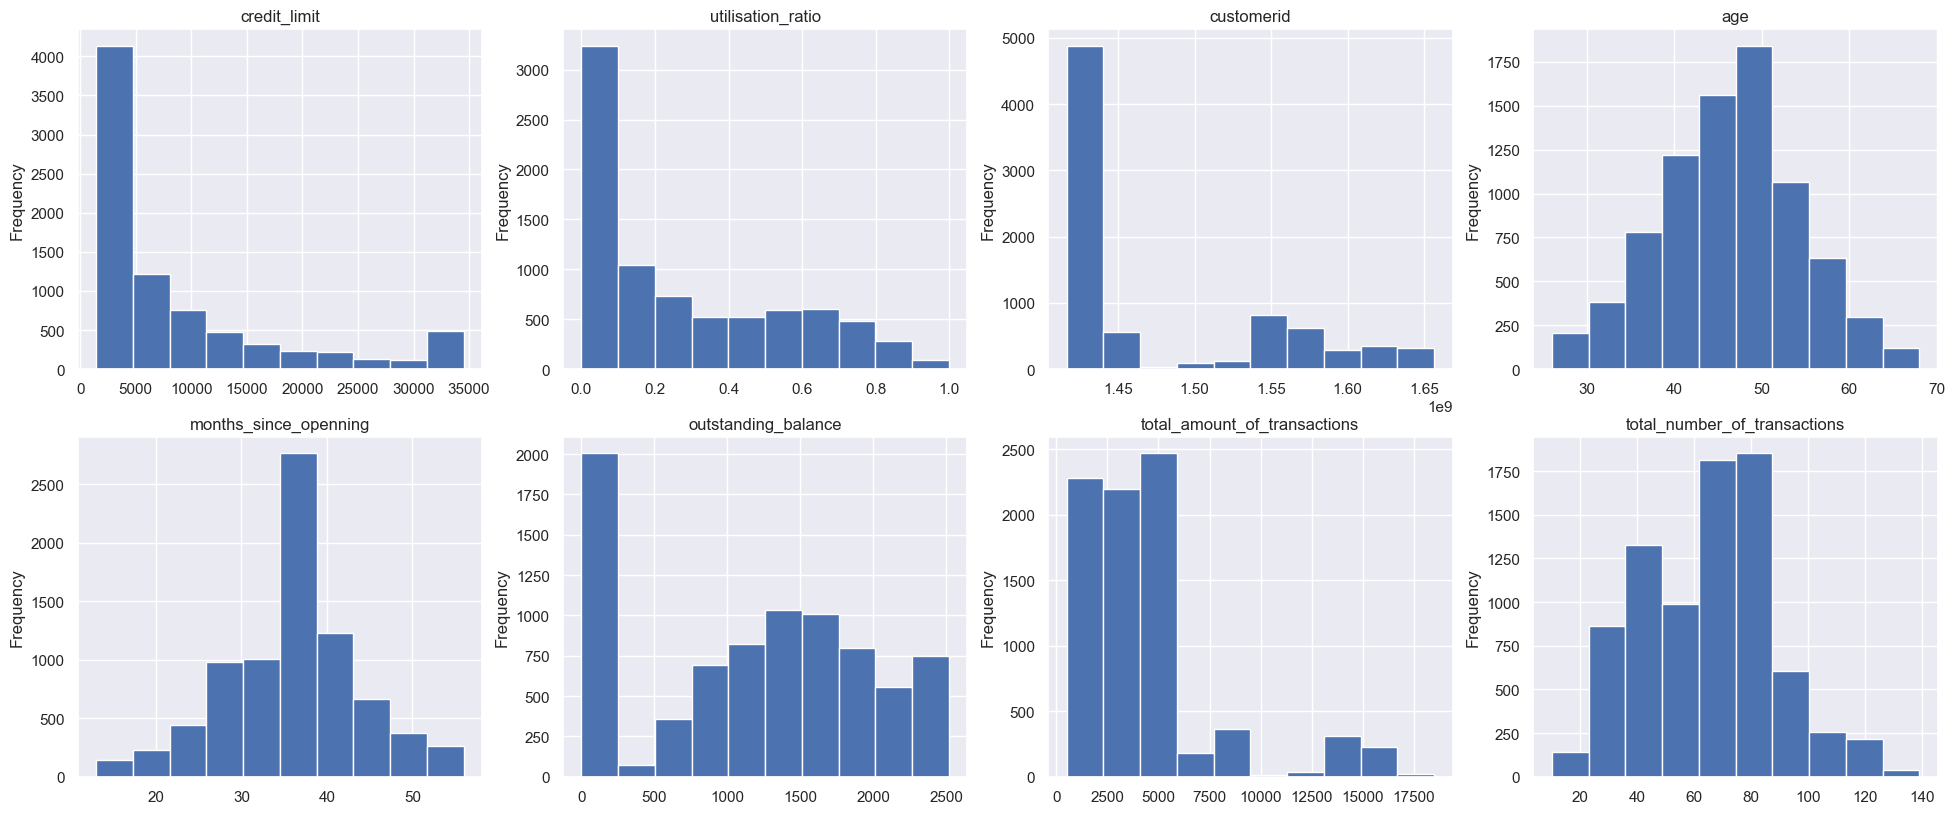

In [14]:
fig = plt.figure(figsize =[24,15])
i = 0 
for col in data[num_cols]:
    sub = fig.add_subplot(3, 4, i+1)
    sub.set_title(col)
    data[col].plot(kind = "hist")
    i+=1

In [15]:
data[num_cols].skew()

credit_limit                    1.647683
utilisation_ratio               0.724686
customerid                      0.997471
age                            -0.029369
months_since_openning          -0.112982
outstanding_balance            -0.151249
total_amount_of_transactions    2.049902
total_number_of_transactions    0.153035
dtype: float64

* Credit Limit: The distribution is highly skewed to the right showing a large range of values between 1438.30 and 34516 with an average value of 8686.22. The skewness of the credit_limit distribution is 1.647683.
* Utilisation Ratio: This distribution is not as skewed as that of credit limit but still shows a long tail to the right. It has a skewness of 0.724686.
* Customer ID: This distribution is not really needed for analysis as we don't know how these ID’s were generated but based on the histogram plot and the the skewness value of 0.99741 shows it is skewed to right which is expected.
* Age: This distribution is the most normal distribution in the dataset with a skewness value of -0.029369 which shows a slight skew to the left.
* Months since Opening: This distribution is also slightly skewed with a skewness of  -0.112982. It is not as normal as Age but still more normal than other features in the dataset.
* Outstanding Balance: This distribution shows a slight skew to the left with a skewness of -0.151249.
* Total Amount of Transactions: This is the most skewed feature in the dataset. It shows a long right tail and has a positive skewness of 2.049902.
* Total Number of Transactions: This distribution is almost normal with a slight skew to the right with a skewness value of 0.153035.


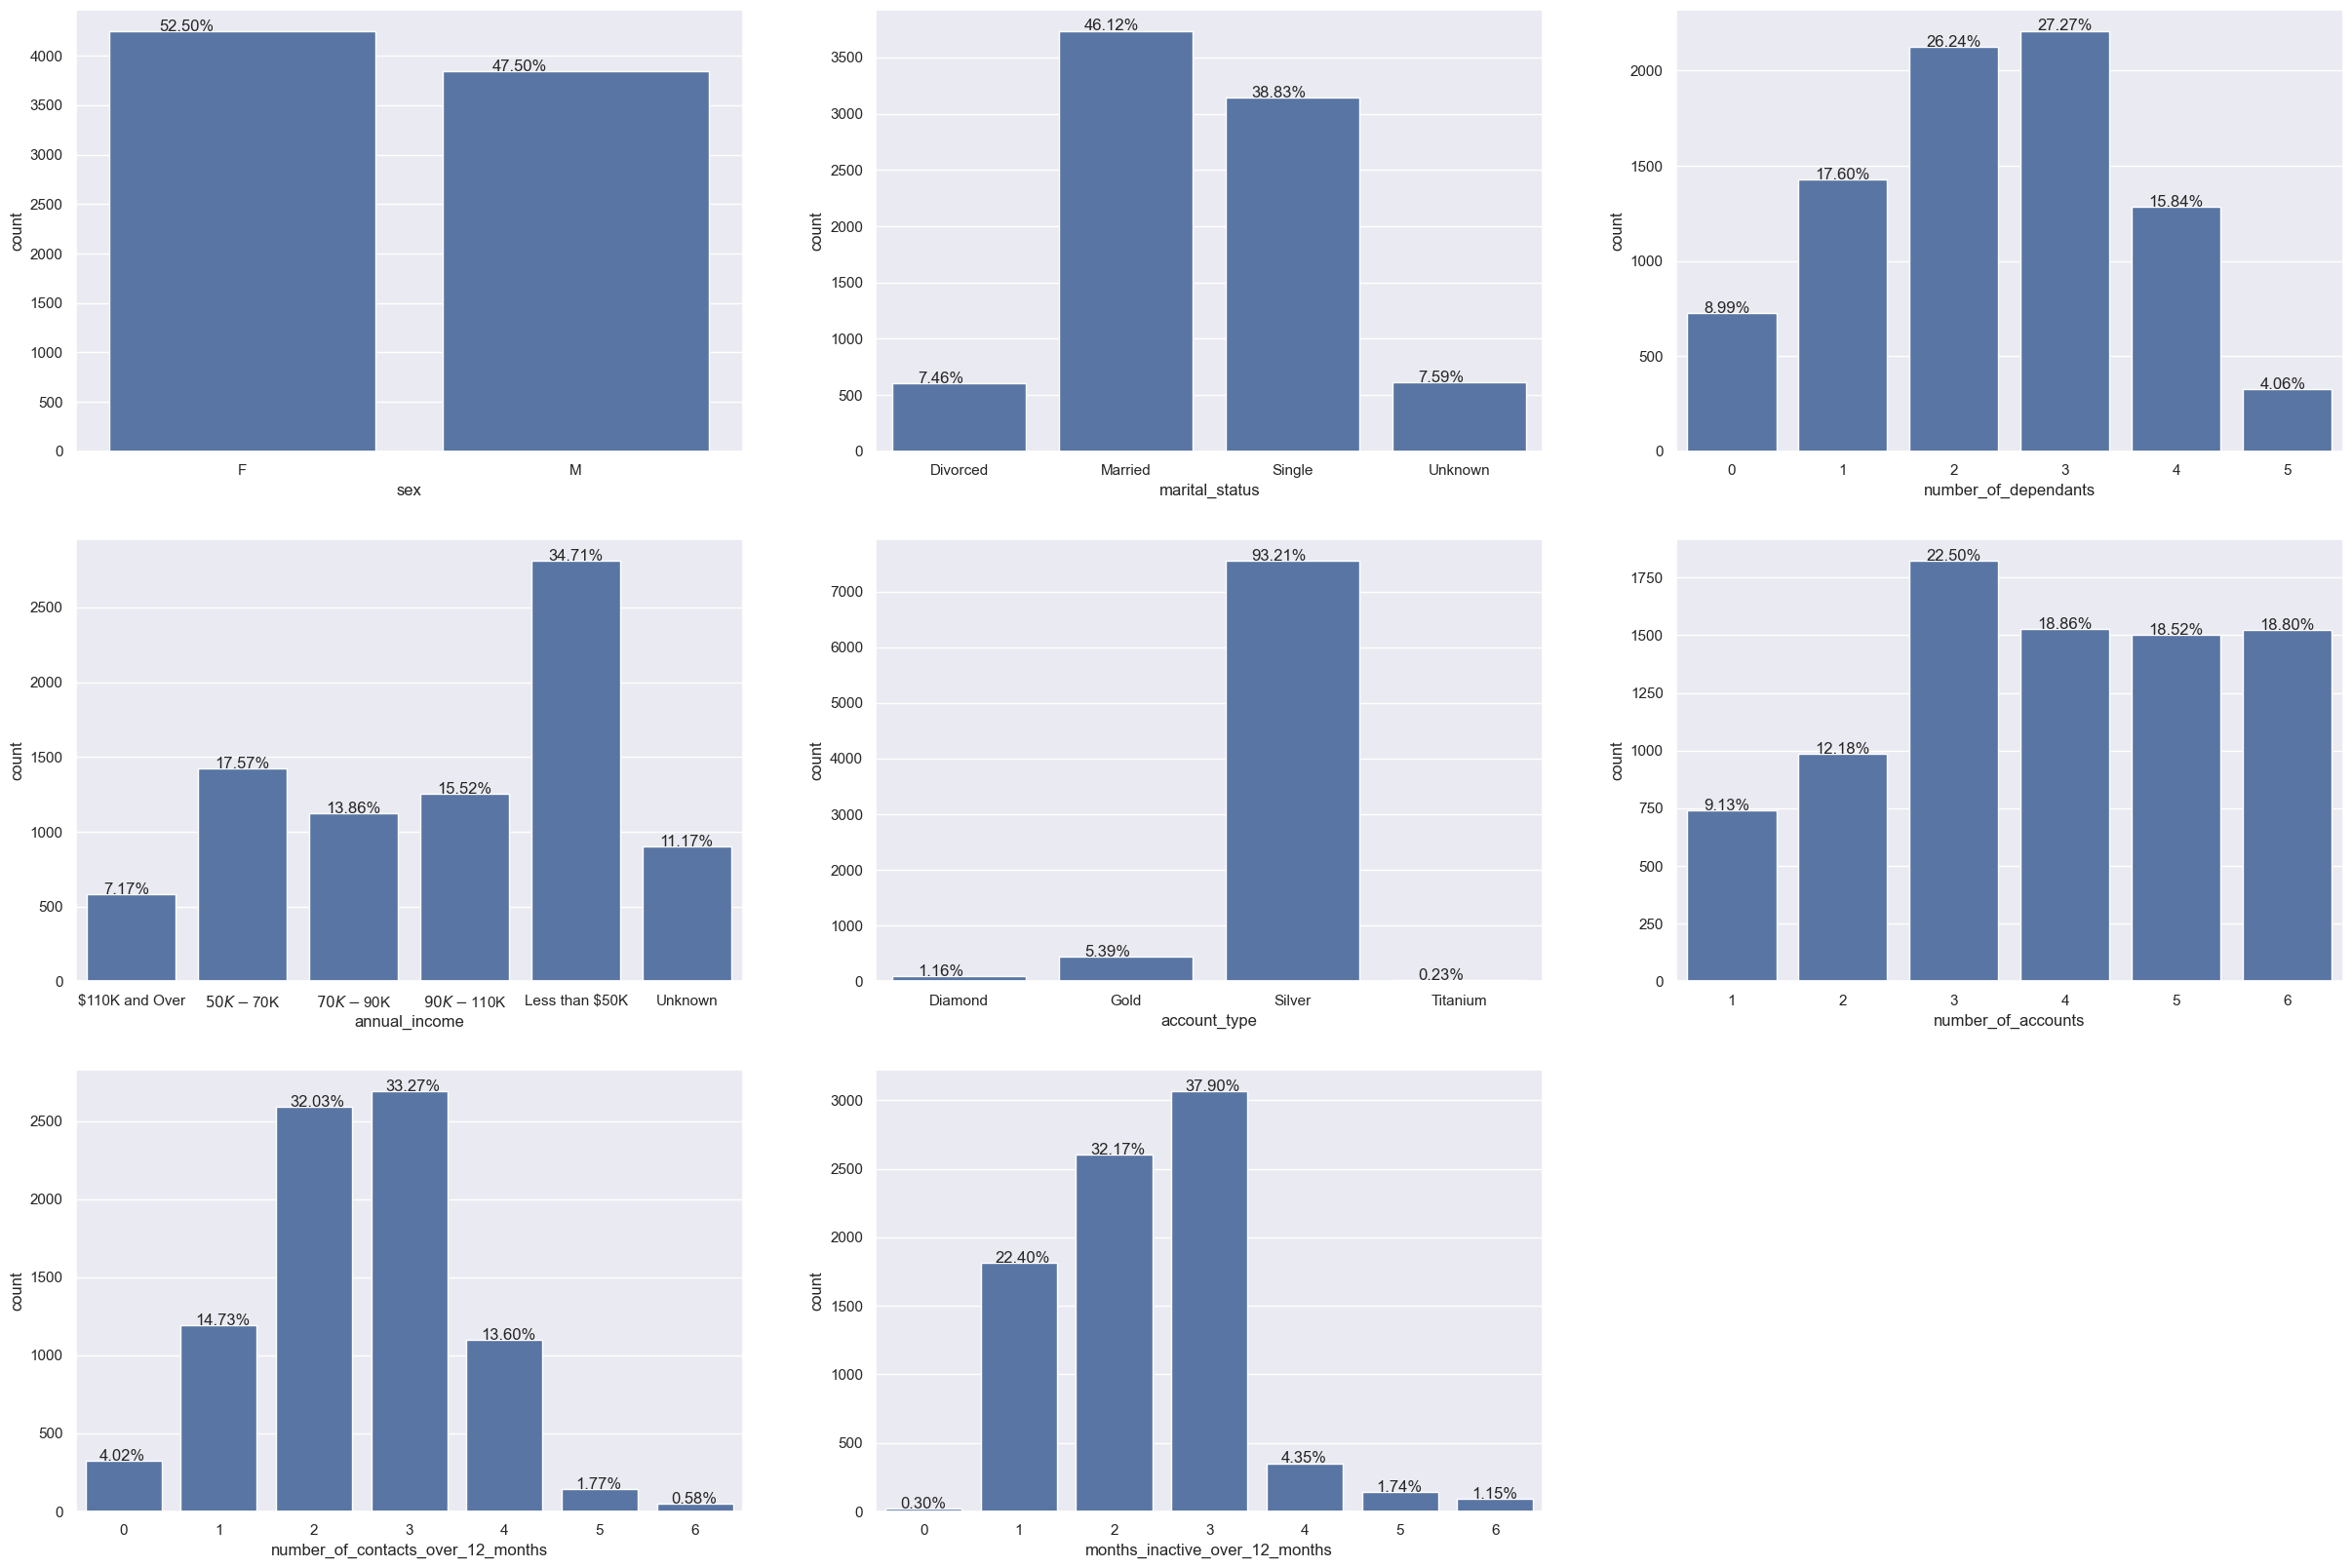

In [16]:
fig = plt.figure(figsize =[30,20])
i = 0 
palette = sns.color_palette(n_colors=1)
for col in data[cat_cols]:
    sub = fig.add_subplot(3, 3, i+1)
    ax = sns.countplot(data=data, x=col, palette = palette)
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()*100/data.shape[0]), (p.get_x()+0.15, p.get_height()+0.65))
    i+=1

* Sex: There were more females (52.50%) than males (47.50%) in the dataset. The imbalance is not that high in this case.
* Marital Status: 7.59% of the data were “Unknown” i.e 7.59% of the dataset had no recorded marital_status. This shows bad data quality and integrity. Most of the customers in the dataset were married (46.12%).
* Number of Dependents: Over 70% of the customers had between 1 to 3 dependents with only 8.99% having no dependents.
* Annual Income: 11.17% of the customer’s annual income was missing and recorded as “Unknown” in the dataset. Most of the customers earned less than $50K (34.71%).
* Account Type: A huge amount of customers in the dataset had silver accounts(93.21%). Less than 1% had titanium accounts.
* Number of Accounts: Most Customers in the dataset had 3 or more accounts (78.68%).  Only 21.32% had 2 accounts or less.
* Number of contacts over 12 months: Over 60% of the customers had either 2 or 3 contacts over the 12 months.
* Months Inactive Over 12 months: Most customers fell into the category of being inactive for 3 months (37.90%). Less than 0.5% of the customers were active for all 12 months.


#### Bivariate Analysis

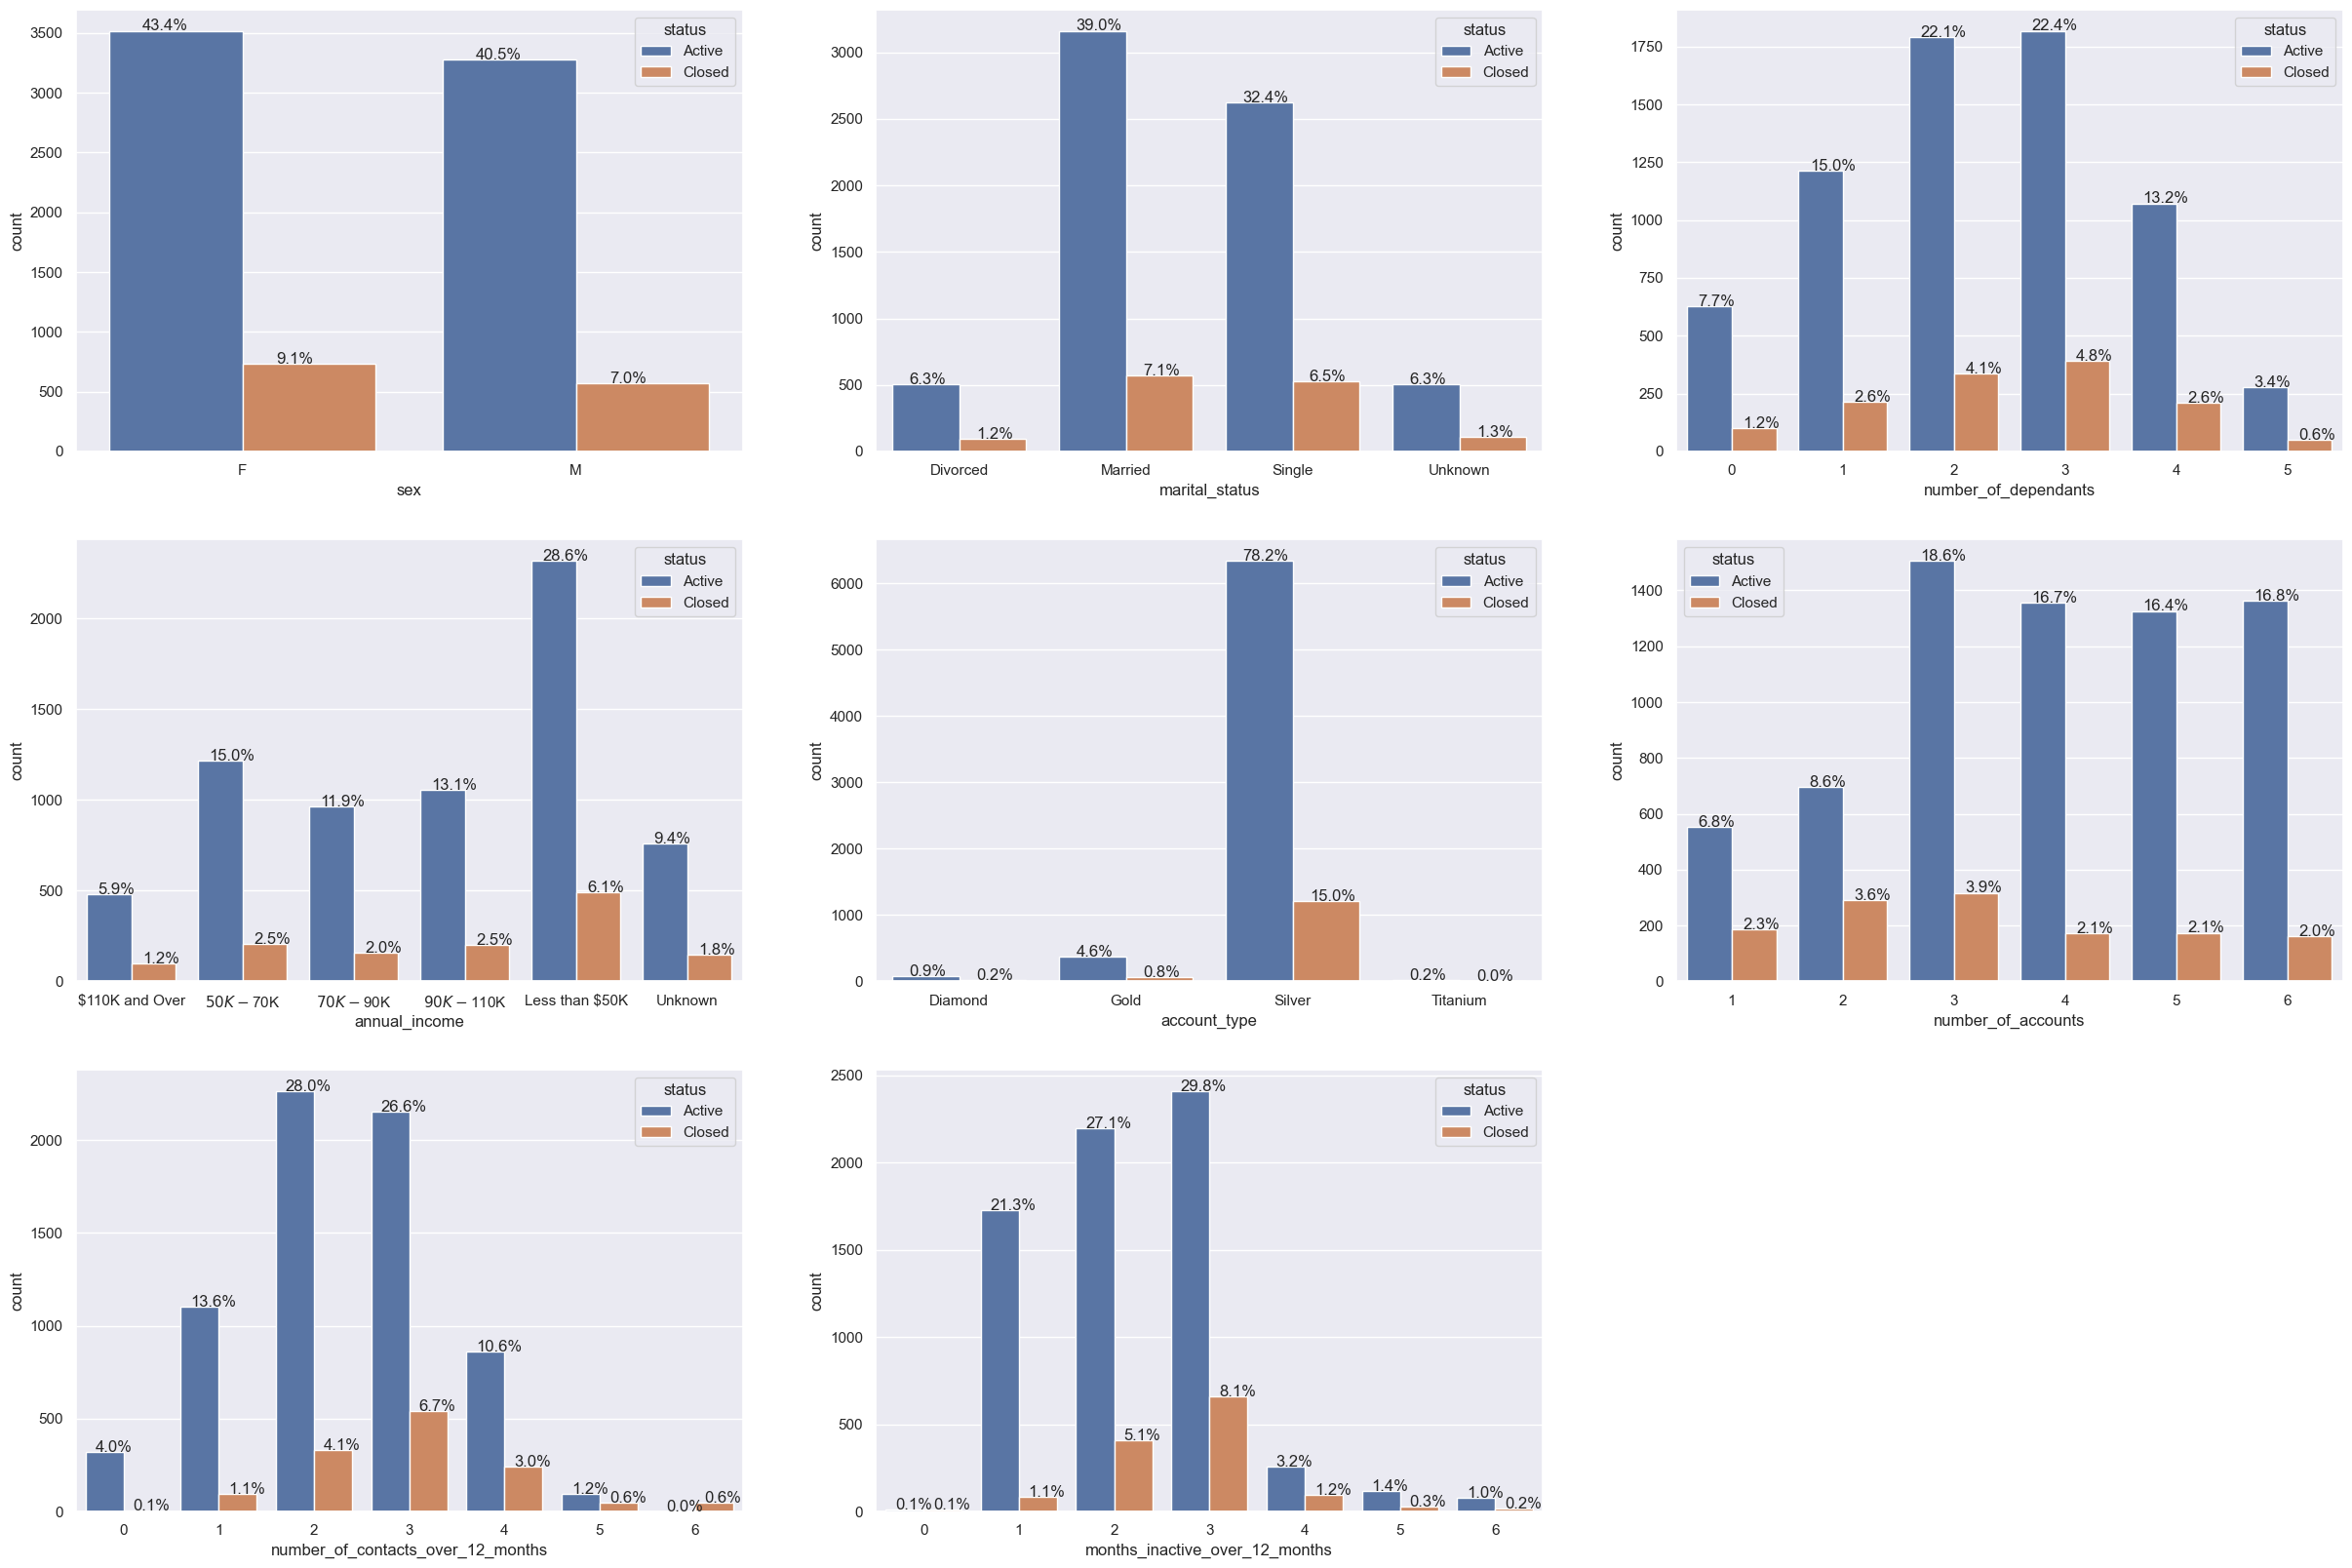

In [17]:
## Categoricals Vs Target

fig = plt.figure(figsize =[30,20])
i = 0 

for col in data[cat_cols]:
    sub = fig.add_subplot(3, 3, i+1)
    ax = sns.countplot(data=data, x=col, hue = target)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()*100/data.shape[0]), (p.get_x()+0.1, p.get_height()+0.65))
    i+=1

* Sex: Of the 52.5% females in the dataset, 9.1% of them had a closed status. Similarly, of the 47.5% of males, 7.0% of them had a closed status.
* Marital Status: Of the 7.59% with “Unknown” values in this feature, only 1.3% closed their accounts. Similarly, of the 46.2% married customers, 7.1% had a closed status.
* Number of Dependents: Of the 70% of  customers who had between 1 to 3 dependents, 11.5% had close accounts. Also, 8.99% having no dependents had 1.2% closed accounts.
* Annual Income: Of the 11.17% having  “Unknown” annual incomes, 1.8% had closed accounts. Of the 34.71% of customers who earned less than $50K, 6.1% had closed accounts.
* Account Type: Of the 93.21% that had silver accounts, 15% of them later closed their accounts. Of the 0.23% that had titanium accounts, 0% closed their accounts. It is interesting to note that as the grade of account type increases, the number of close accounts decreases.
* Number of Accounts: Of the 78.68% with 3 or more accounts, 10.1% had closed accounts .  Of the  21.32% that had 2 accounts or less, 5.9% had closed accounts.
* Number of contacts over 12 months: Closed accounts had a steady increase from 1 contact to 3 contacts then continued decreasing. At 6 contacts, we see that no active customer was left.
* Months Inactive Over 12 months: Closed accounts had a steady increase from 1 inactive month to 3 inactive months then continued decreasing. At 6 months of inactiveness, we see that only 1% of active customers were left.


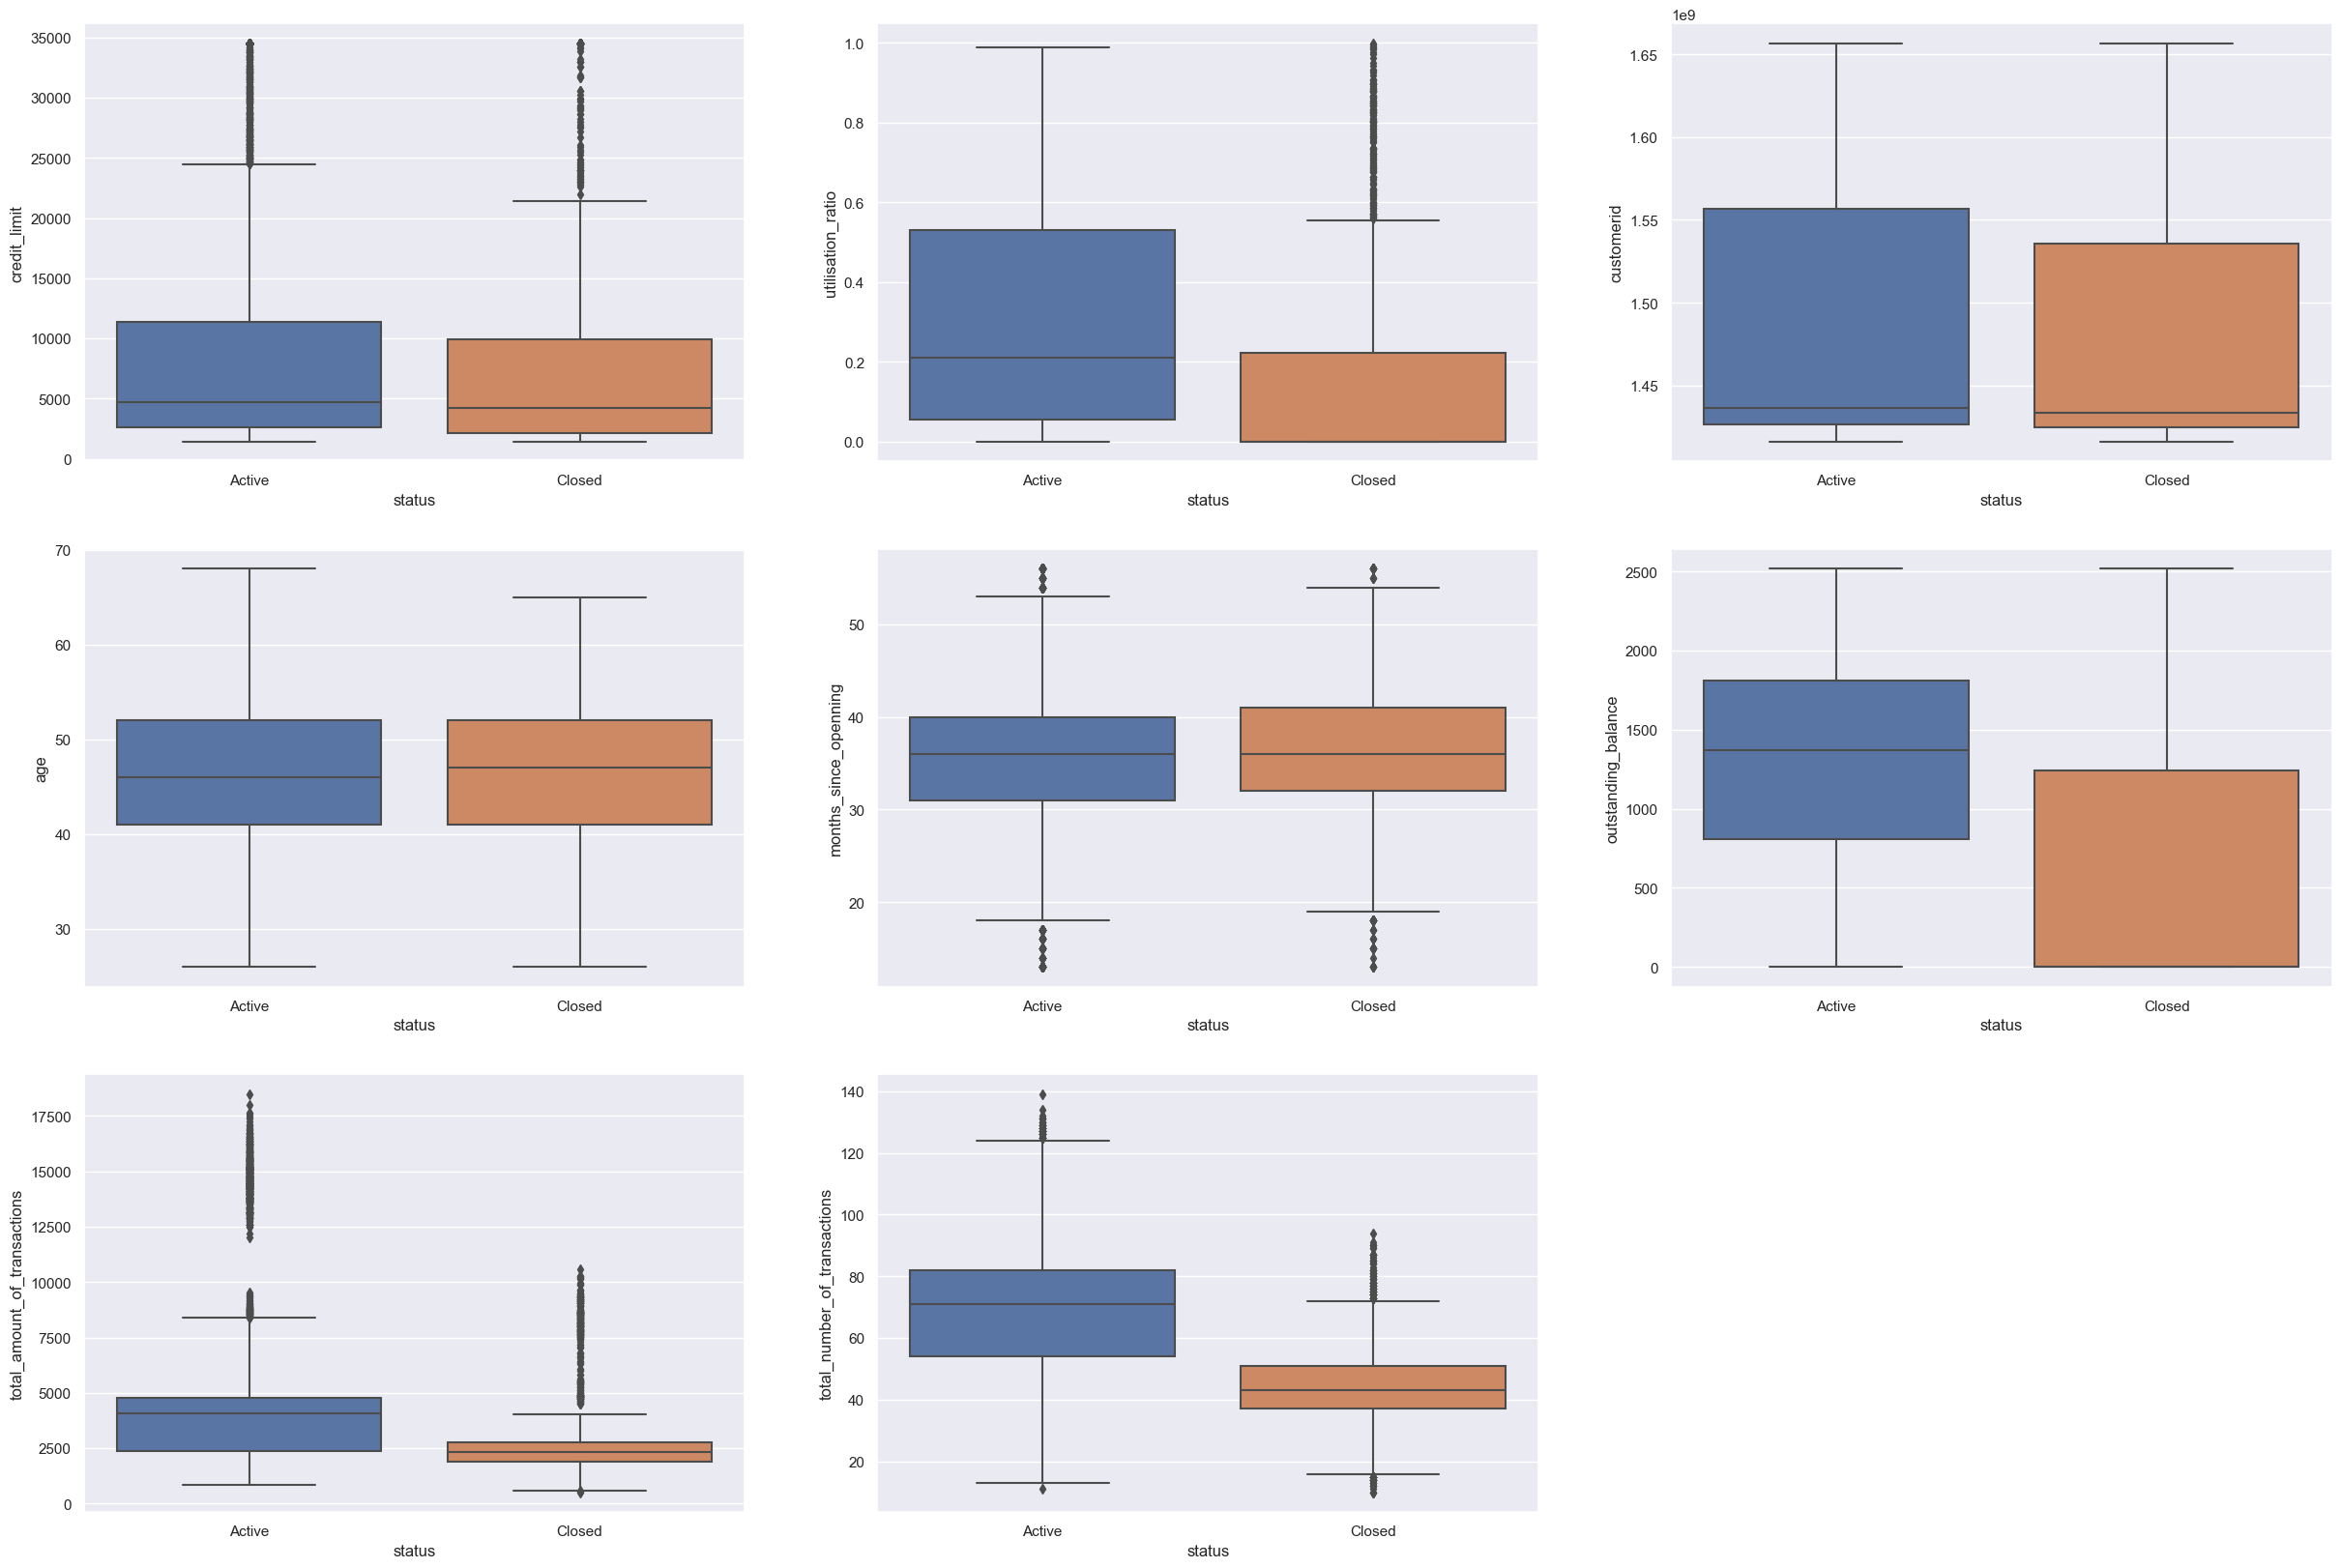

In [18]:
## Numericals vs Target
fig = plt.figure(figsize =[30,20])
i = 0 

for col in data[num_cols]:
    sub = fig.add_subplot(3, 3, i+1)
    sns.boxplot(data=data, x = target, y = col)
    i+=1

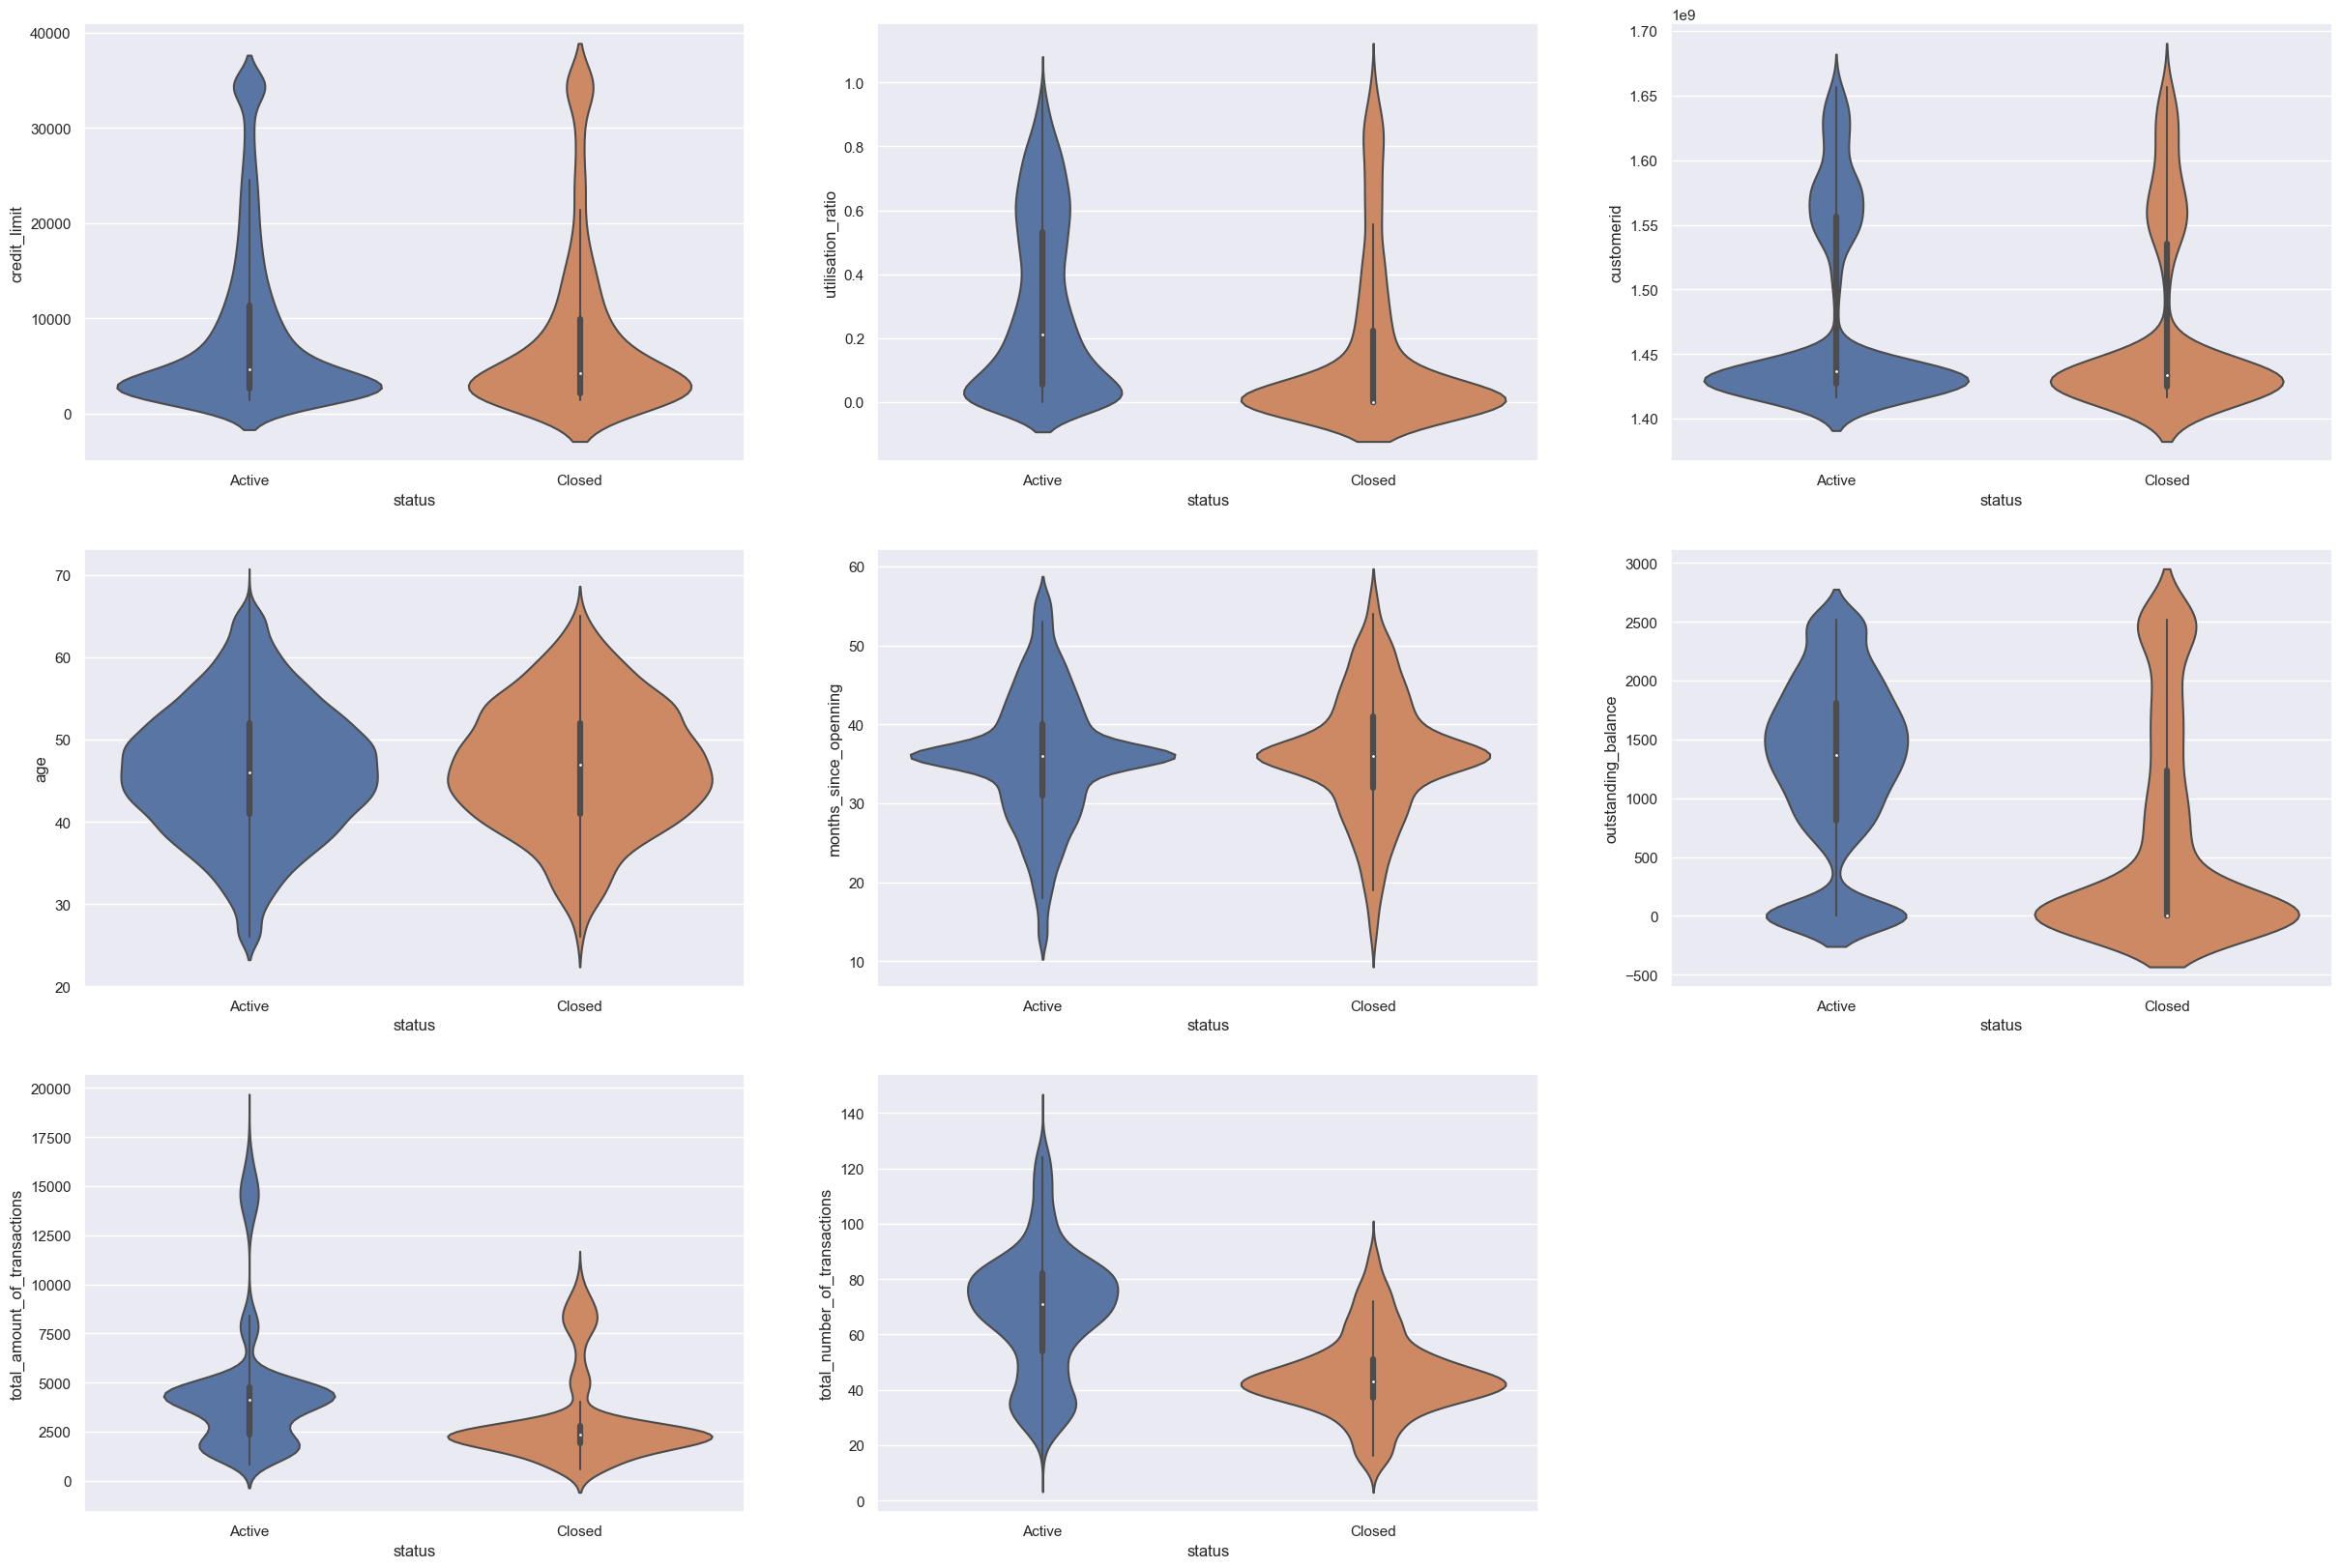

In [19]:
fig = plt.figure(figsize =[30,20])
i = 0 

for col in data[num_cols]:
    sub = fig.add_subplot(3, 3, i+1)
    sns.violinplot(data=data, x = target, y = col)
    i+=1

Based on the plots (violin and Box), the following insights were observed:
* Credit Limit: The distribution of the active status and closed status are almost similar but we see that the credit limit of active customers had higher values and a higher average than closed accounts. This implies that active accounts are more likely to use up their credit limit.
* Utilisation Ratio: In this distribution, the differences are much more pronounced, the active accounts had a bigger and higher range of distribution in terms of utilisation ratio than the closed accounts. There are a lot of outliers in the distribution of the closed accounts compared to the active accounts. This implies that closed accounts have a lower utilisation ratio.
* Age: Almost similar distribution between the closed accounts and active accounts. One difference is the higher range of the active accounts and the lower average when compared to the closed accounts.
* Months since Opening: Similar distribution is observed. Very close averages. 
* Outstanding Balance: One interesting thing to notice is that most of the closed account’s distribution is lower than the average of the active account’s distribution.
* Total Amount of Transactions, Total Number of Transactions: Similar to the outstanding balance, most of the closed account’s distribution is lower than the average of the active account’s distribution. This implies that customers are more likely to close an account that is not used often.


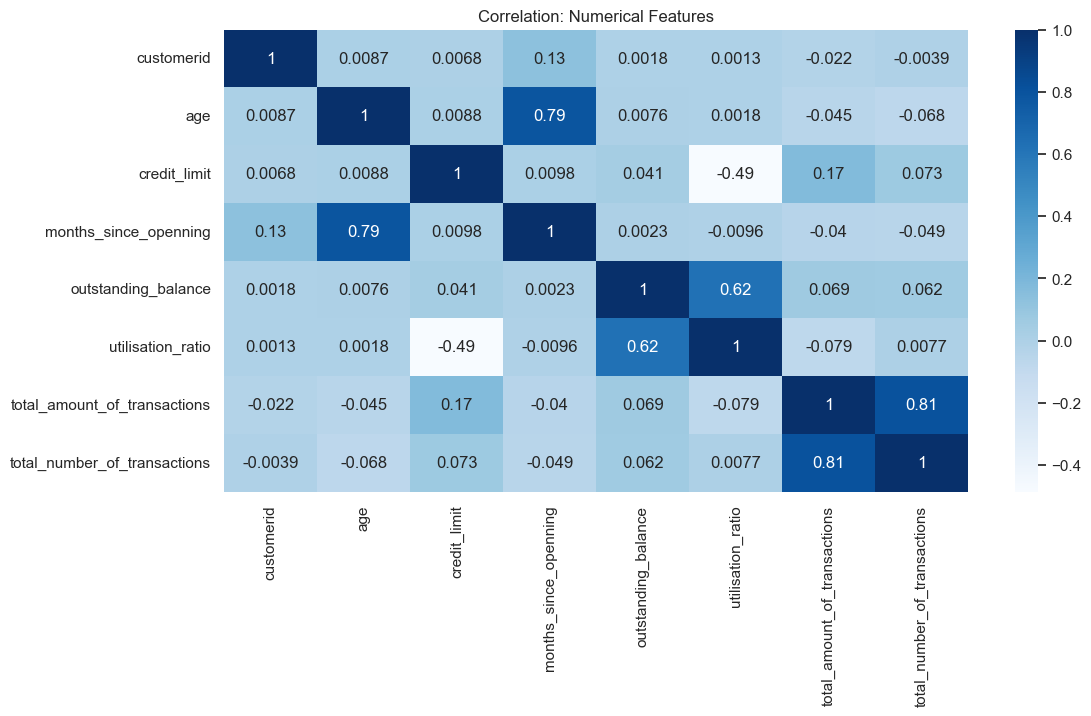

In [20]:
plt.figure(figsize = [12,6])
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap="Blues")
plt.title("Correlation: Numerical Features");

Correlations which are noticeably high and evident from the heatmap include:
* Total Number of Transactions & Total Amount of Transactions - 0.81 : Strong, positive correlation.
* Age & Months since Opening - 0.79: Strong, positive correlation.
* Utilisation ratio & Outstanding balance - 0.62: Moderately high, positive correlation.


In [21]:
import pandas as pd
import scipy.stats as stats



# Calculate correlation categorical variables using Cramér's V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [22]:
## Categoricals vs Target
col_list = []
corr_list = []

for col in data[cat_cols]:
    col_list.append(col)
    corr = cramers_v(pd.crosstab(data[target], data[col]))
    corr_list.append(corr)
    
corr_dict = {}
corr_dict['column'] = col_list
corr_dict['corr'] = corr_list

pd.DataFrame(corr_dict)

,column,corr
0,sex,0.031734
1,marital_status,0.007066
2,number_of_dependants,0.021316
3,annual_income,0.027701
4,account_type,0.000000
5,number_of_accounts,0.178483
6,number_of_contacts_over_12_months,0.238531
7,months_inactive_over_12_months,0.187901


The correlations are not that high and only three features had correlations more than 0.1 and they include:
* Number of Accounts
* Number of Contacts over 12 months
* Months inactive over 12 months


In [23]:
## Numericals vs Target
col_list = []
pvalue_list = []
statistic_list = []

for col in data[num_cols]:
    corr = stats.pointbiserialr(data[target].astype('category').cat.codes, data[col])
    col_list.append(col)
    pvalue_list.append(round(corr.pvalue, 4))
    statistic_list.append(round(corr.statistic, 4))
    
cat_corr = {}
cat_corr['column'] = col_list
cat_corr['statistic'] = statistic_list
cat_corr['pvalue'] = pvalue_list

pd.DataFrame(cat_corr)

,column,statistic,pvalue
0,credit_limit,-0.0241,0.0302
1,utilisation_ratio,-0.1850,0.0000
2,customerid,-0.0470,0.0000
3,age,0.0269,0.0154
4,months_since_openning,0.0167,0.1328
5,outstanding_balance,-0.2727,0.0000
6,total_amount_of_transactions,-0.1672,0.0000
7,total_number_of_transactions,-0.3705,0.0000


<a id = "cell_modeling"></a>
## 3. Machine learning model development


In [24]:
#encoding the target variable
data[target] = (data[target] == "Closed").astype(int).astype('category')

In [25]:
# removing the customer id from the data
num_cols.pop(num_cols.index('customerid'))
data.drop(columns = ['customerid'], inplace = True)

In [26]:
# splitting dataset

from sklearn.model_selection  import train_test_split
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5670, 15), (2431, 15), (5670,), (2431,))

In [27]:
# Model Training

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Defining the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols), # scaling numeric columns
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols) # one-hot encoding categorical column
    ])

# Define models
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42, probability=True)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42, eval_metric='auc')),
    ('nb', GaussianNB())
]

# Define pipeline
model_list = []
auc_list = []
acc_list = []
time_list = []

for model in models:
    start = time.time()
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        model
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)
    end = time.time()

    train_time = end-start

    # Evaluate pipeline on test data
    model_name = str(model).split(",")[0].replace("(", "")
    y_pred = pipeline.predict_proba(X_test)[:,1]
    acc = pipeline.score(X_test, y_test)
    auc = roc_auc_score(y_test, y_pred)
    
    model_list.append(model_name)
    auc_list.append(auc)
    acc_list.append(acc)
    time_list.append(train_time)
    

model_dict = {}    
model_dict['Model'] = model_list
model_dict['AUC'] = auc_list
model_dict['Accuracy'] = acc_list
model_dict['Train Time'] = time_list

model_df = pd.DataFrame(model_dict)

In [28]:
model_df.sort_values(by = 'AUC', ascending=False)

,Model,AUC,Accuracy,Train Time
5,'xgb',0.987754,0.962978,0.779999
1,'gb',0.984517,0.956808,2.017000
0,'rf',0.976909,0.947758,1.320958
3,'svm',0.965642,0.932127,4.129954
2,'dt',0.883512,0.936652,0.058996
4,'knn',0.880412,0.904977,0.020000
6,'nb',0.847885,0.851913,0.038006


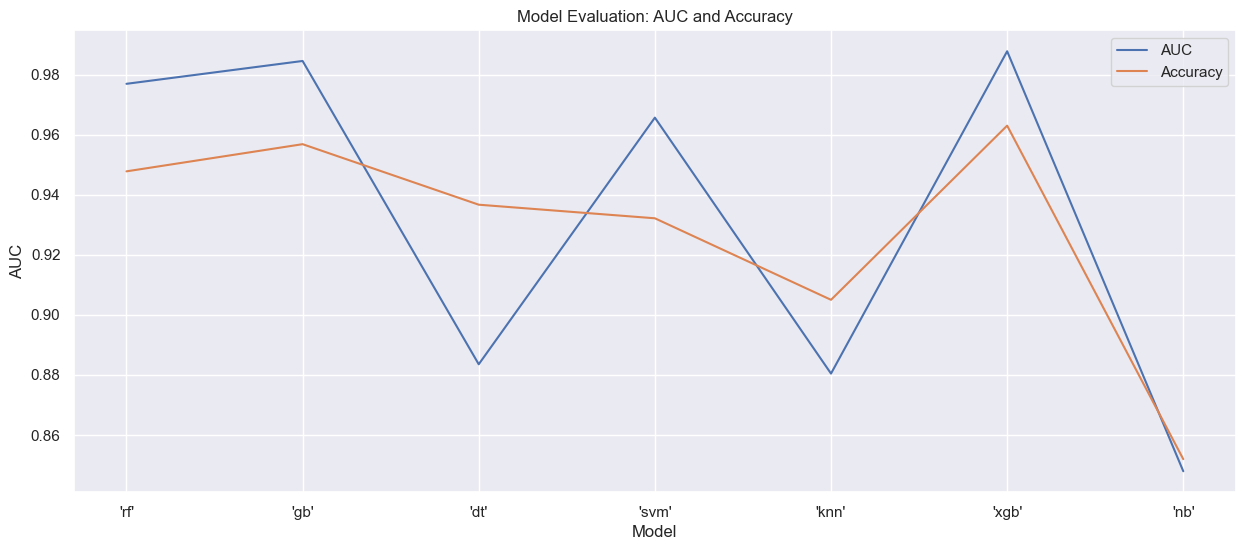

In [29]:
plt.figure(figsize = [15,6])
sns.lineplot(data = model_df, x = 'Model', y = 'AUC', label = "AUC")
sns.lineplot(data = model_df, x = 'Model', y = 'Accuracy', label = "Accuracy")
plt.title("Model Evaluation: AUC and Accuracy");

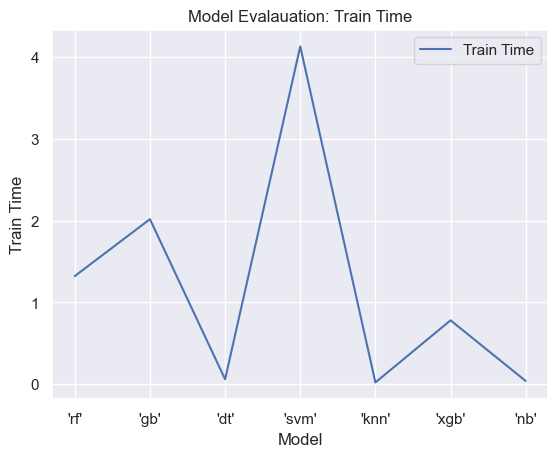

In [30]:
sns.lineplot(data = model_df, x = 'Model', y = 'Train Time', label = "Train Time")
plt.title("Model Evalauation: Train Time");

The best AUC(~0.9878) and Accuracy(~0.96298) was achieved using the Xgboost Classifier. It had a train time of 1.036003 secs which is better than some of the models but slower than the decision tree, K nearest neighbor classifier, etc.

The Xgboost model is tuned and evaluated better in the next section.

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       


In [31]:
## defining the best model
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(random_state=42, eval_metric='auc'))
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)
acc = pipeline.score(X_test, y_test)

print(f"AUC: {auc}, Accuracy: {acc}")

AUC: 0.9877540774512198, Accuracy: 0.9629781982723159


In [32]:
##Hyperparameter Tuning

# Define the pipeline
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(random_state=42, eval_metric='auc'))
    ])

# Define the parameter grid for tuning
param_grid = {
    'model__learning_rate': [0.1, 0.15],
    'model__max_depth': [4, 5],
    'model__reg_alpha': [1.0],
    'model__n_estimators': [120, 140]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict and evaluate the best model on the test set
y_pred = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

# Print the best hyperparameters and AUC
print("Best Hyperparameters: ", best_params)
print("Best AUC: ", auc)


Best Hyperparameters:  {'model__learning_rate': 0.15, 'model__max_depth': 4, 'model__n_estimators': 140, 'model__reg_alpha': 1.0}
Best AUC:  0.9883891014681538


The best hyperparameters will be used in training the final model to be evaluated.

In [33]:
## Best Hyperparameters Model
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(random_state=42, eval_metric='auc', 
                                learning_rate= 0.15, max_depth= 4,
                                n_estimators = 140, reg_alpha=1.0))
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)
acc = pipeline.score(X_test, y_test)

print(f"AUC: {auc}, Accuracy: {acc}")

AUC: 0.9883891014681538, Accuracy: 0.9633895516248457


The Xgboost model which is the best model hyper parameters were tuned using gridsearch and cross validation and the best parameters increased the AUC to approximately 0.99 and an accuracy of 0.9634. 

In [34]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_limit',
                                                   'utilisation_ratio', 'age',
                                                   'months_since_openning',
                                                   'outstanding_balance',
                                                   'total_amount_of_transactions',
                                                   'total_number_of_transactions']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'marital_status',
                                                   'number_of_dependants',
                                                   'annual_in...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=140,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

#### Final Model Evaluation

In [35]:
## Classification Report

from sklearn.metrics import classification_report

# Predict labels for test set
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2076
           1       0.90      0.85      0.87       355

    accuracy                           0.96      2431
   macro avg       0.94      0.91      0.92      2431
weighted avg       0.96      0.96      0.96      2431



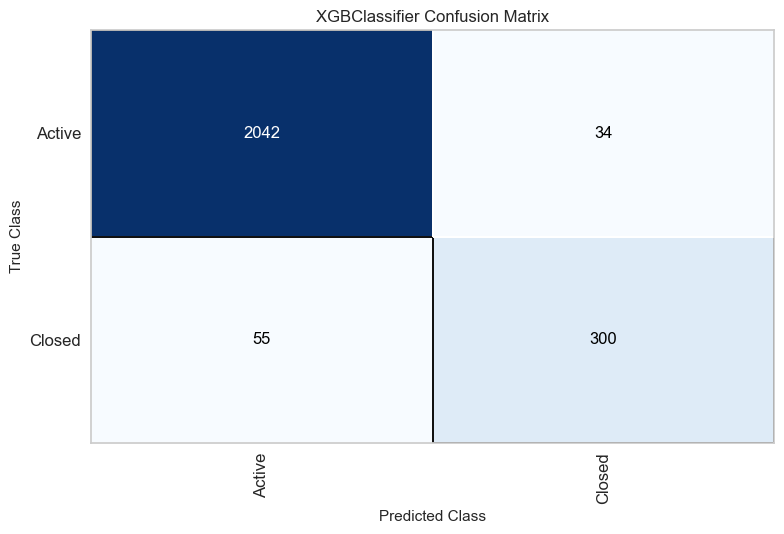

In [36]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

classes = ["Active", "Closed"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# generate confusion matrix diagram
cm_viz = ConfusionMatrix(pipeline, classes=classes, cmap="Blues")
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show(outpath="confusion_matrix.png");

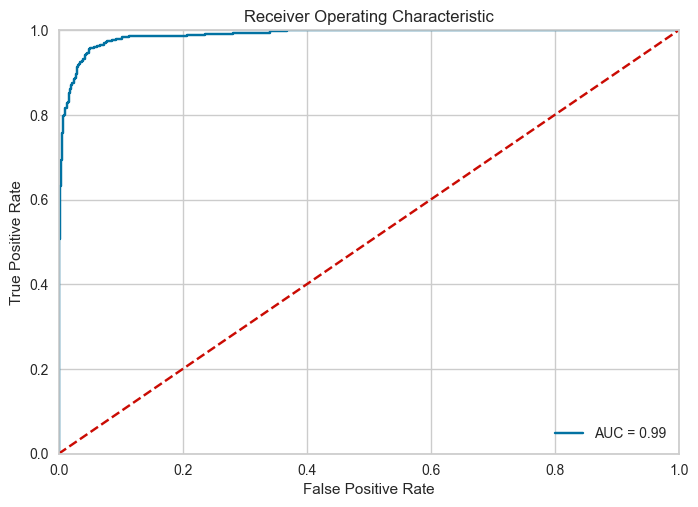

In [37]:
## ROC curve
import sklearn.metrics as metrics

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Feature Importance

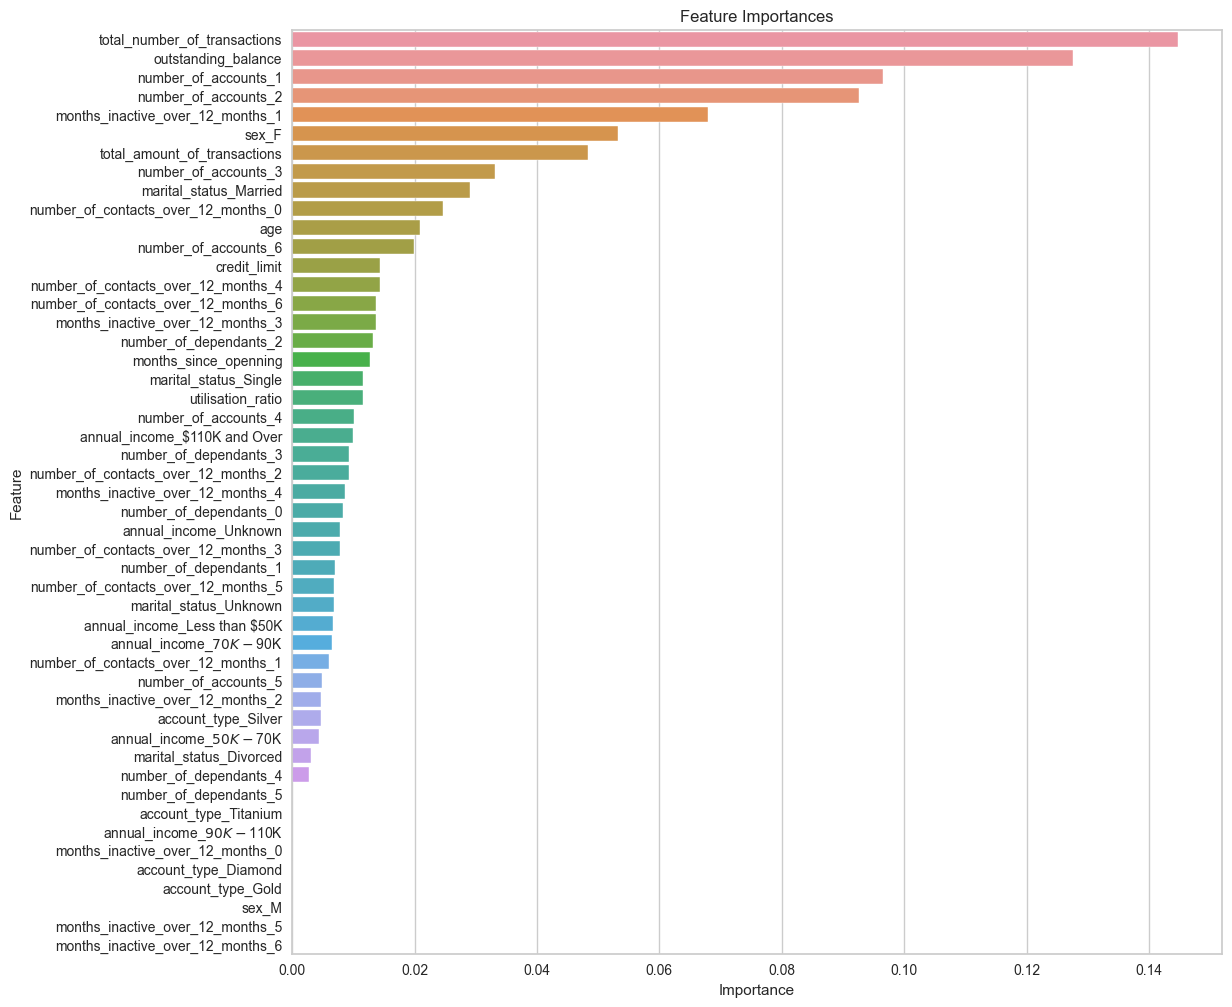

In [38]:
#feature Importance 

cat_feat = preprocessor.named_transformers_['cat_onehot'].get_feature_names_out()
num_feat = preprocessor.named_transformers_['num'].get_feature_names_out()
feature_names = np.concatenate((num_feat, cat_feat))

importances = pipeline.named_steps['model'].feature_importances_

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize = [12,12])
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances')
plt.show()

The feature importance analysis revealed that several variables significantly contribute to customer attrition. The most influential factors include the total number of transactions, outstanding balance, number of accounts, and months of inactivity. These findings indicate that customers who do not make a lot of transactions, have a high outstanding balance, have multiple accounts, and have been inactive for a long period of time are more likely to churn.

## 5. Deployment (Competition)




In [39]:
import pandas as pd

In [40]:

df_deploy = pd.read_csv("VSNeoBank_competition.csv")


In [41]:
def preprocess(data):
    data.columns = [cols.replace(" ", "_").lower() for cols in data.columns]
    for col in data.columns:
        if data[col].nunique() <= 7:
            data[col] = data[col].astype("category")
    cat_cols = (list(data.select_dtypes("category").columns))[:-1]
    num_cols = (list(data.select_dtypes(float).columns))
    num_cols.extend(list(data.select_dtypes(int).columns))
    num_cols.pop(num_cols.index('customerid'))
    data.drop(columns = ['customerid'], inplace = True)
    
    return data
    

In [42]:
# Apply data transformation to the deployment data, 
# ensure number of features and transformation of X and X_deploy are similar

X_deploy = preprocess(df_deploy)

# Apply trained model to X_deploy 
y_deploy = pipeline.predict(X_deploy)

# 
# join unseen y_deploy with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_deploy})

# join X_test with the new dataframe
inspection = pd.concat([X_deploy, inspection], axis=1)

# Submit this results.csv file to join the competition
inspection.to_csv('results.csv') 

In [43]:
pd.Series(y_deploy).value_counts(normalize=True)

0    0.854393
1    0.145607
Name: proportion, dtype: float64

The attrition rate in the deployment data is approximately 14.5% 
The attrition rate in the original data was approximately 16%

Thus there was an approximately 2% decrease in attrition rate 